# Exploratory Data Analysis and Visualization on Uber trips
In this project, we will analyze the **Uber Pickups in New York City** dataset. We shall do visualizations for different time-frames of the year. This will help us develop an intuition for understanding how time affects customer trips. Through these data visualizations, companies can avail the benefit of understanding the complex data and gain insights that would help them to craft decisions.

## Steps for analyzing the uber data
**Step 1** - Importing the essential packages for the project

**Step 2** - Loading the data to the jupyter notebook. We shall read csv files that contain the data from April 2014 to September 2014. We will store these in corresponding dataframes for each month. After we read the files, we will combine all of this data into a single dataframe containing all the data for the year 2014.

**Step 3** - Data Analysis and Manipulation. Here, we will perform appropriate formatting of Date/time column and create time objects like day, month, year etc from the given date using *datetime* module.

**Step 4** - Data visualizations of the trips based on different time objects.

## Importing the essential packages for the project

In [1]:
# import data analysis modules to work with
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# import data visualization modules to work with
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# this is a magic command to make the plots appear properly in the ipython notebook environment
%matplotlib inline 

In [2]:
# this code disables warnings that may arise from the jupyter notebook
import warnings
warnings.filterwarnings('ignore')

## Loading the data

In [3]:
# load the various uber datasets and set them to dataframes
uber_apr_df = pd.read_csv('uber-raw-data-apr14.csv')
uber_may_df = pd.read_csv('uber-raw-data-may14.csv')
uber_jun_df = pd.read_csv('uber-raw-data-jun14.csv')
uber_jul_df = pd.read_csv('uber-raw-data-jul14.csv')
uber_aug_df = pd.read_csv('uber-raw-data-aug14.csv')
uber_sep_df = pd.read_csv('uber-raw-data-sep14.csv')

In [4]:
uber_jul_df.head()

,Date/Time,Lat,Lon,Base
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512


In [5]:
uber_jul_df

,Date/Time,Lat,Lon,Base
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512
...,...,...,...,...
796116,7/31/2014 23:22:00,40.7285,-73.9846,B02764
796117,7/31/2014 23:23:00,40.7615,-73.9868,B02764
796118,7/31/2014 23:29:00,40.6770,-73.9515,B02764
796119,7/31/2014 23:30:00,40.7225,-74.0038,B02764


In [6]:
uber_apr_df.shape

(564516, 4)

In [7]:
uber_sep_df.shape

(1028136, 4)

We shall join all the monthly dataframes to one big dataframe for the uber 2014 trips.

In [8]:
# join the months dataframes to one dataframe for the year 2014
uber_2014_df = pd.concat([uber_apr_df, uber_may_df, uber_jun_df, uber_jul_df, uber_aug_df, uber_sep_df], ignore_index=True)

In [9]:
# preview the 2014 dataframe
uber_2014_df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [10]:
uber_2014_df.tail()

,Date/Time,Lat,Lon,Base
4534322,9/30/2014 22:57:00,40.7668,-73.9845,B02764
4534323,9/30/2014 22:57:00,40.6911,-74.1773,B02764
4534324,9/30/2014 22:58:00,40.8519,-73.9319,B02764
4534325,9/30/2014 22:58:00,40.7081,-74.0066,B02764
4534326,9/30/2014 22:58:00,40.7140,-73.9496,B02764


In [11]:
uber_2014_df.shape

(4534327, 4)

In [12]:
# grab general information on the uber 2014 dataframe
uber_2014_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date/Time  object 
 1   Lat        float64
 2   Lon        float64
 3   Base       object 
dtypes: float64(2), object(2)
memory usage: 138.4+ MB


## Data Manipulation

In [13]:
# set the Date/Time column in the dataframe to date
uber_2014_df['Date/Time'] = pd.to_datetime(uber_2014_df['Date/Time'])

In [14]:
uber_2014_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date/Time  datetime64[ns]
 1   Lat        float64       
 2   Lon        float64       
 3   Base       object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 138.4+ MB


In [15]:
# create a year column
uber_2014_df['year'] = uber_2014_df['Date/Time'].dt.year

In [16]:
# define a function for the month column
def month(datestring):
    
    import calendar
    
    return calendar.month_name[datestring.month]

In [17]:
# create a month column by applying the month function on the Date/Time column
uber_2014_df['Month'] = uber_2014_df['Date/Time'].apply(month)

In [18]:
# define a function for the day column
def day_of_the_week(datestring):
    
    import calendar
    
    return calendar.day_name[datestring.weekday()]

In [19]:
# day of month column
uber_2014_df['Day_of_the_Month'] = uber_2014_df['Date/Time'].dt.day

In [20]:
# create a day of the week column by applying the day_of_the_week function on the Date/Time column
uber_2014_df['Day_of_the_Week'] = uber_2014_df['Date/Time'].apply(day_of_the_week)

In [21]:
# define a function for the hour column
def hour(datestring):
    
    return datestring.hour

In [22]:
# create a hour column by applying the hour function on the Date/Time column
uber_2014_df['hour'] = uber_2014_df['Date/Time'].apply(hour)

In [23]:
uber_2014_df.head()

,Date/Time,Lat,Lon,Base,year,Month,Day_of_the_Month,Day_of_the_Week,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,2014,April,1,Tuesday,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014,April,1,Tuesday,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,2014,April,1,Tuesday,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,2014,April,1,Tuesday,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,2014,April,1,Tuesday,0


## Data visualizations of trips based on different time frames
### Trips by hour of the day
How do number of passengers fare throughout the day? This will help us get an intuition on the trend of the number of trips carried out on a particular hour of the day.

Text(0.5, 1.0, 'Trips by Hour and Month')

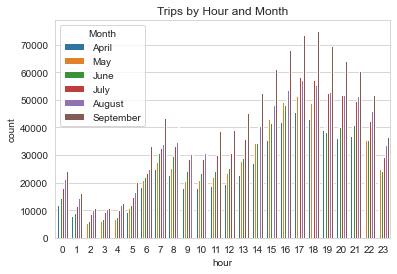

In [24]:
# plot the trips by the hours in a day
sns.countplot('hour', data=uber_2014_df, hue='Month')
plt.title('Trips by Hour and Month')

Text(0.5, 1.0, 'Trips by Hour')

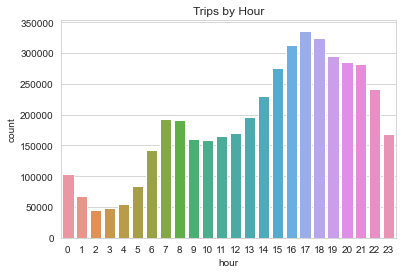

In [25]:
# plot trips by hour of the day every month
sns.countplot('hour', data=uber_2014_df)
plt.title('Trips by Hour')

Generally, it looks like the number of trips tend to increase during the day and they are highest at around 5.00 to 6.00PM. Thereafter, the number of trips start to decrease steadily up to mid-night, after which they rise again towards morning hours.

### Trips by Day of the Week

Text(0.5, 1.0, 'Trips by Day of the Week')

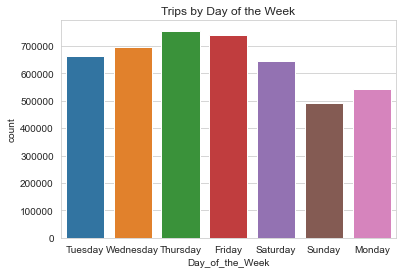

In [26]:
# plot trips by day of the week
sns.countplot('Day_of_the_Week', data=uber_2014_df)
plt.title('Trips by Day of the Week')

Text(0.5, 1.0, 'Trips by Day of the Week every Month')

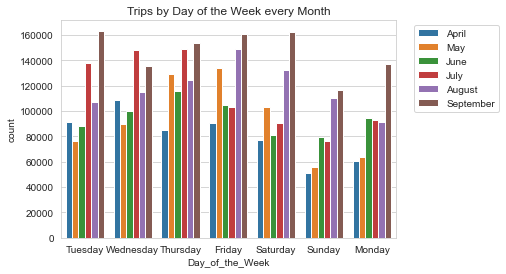

In [27]:
# plot trips by day of the week every month
sns.countplot('Day_of_the_Week', data=uber_2014_df, hue='Month')
plt.legend(bbox_to_anchor=(1.04, 1) ,loc='upper left')
plt.title('Trips by Day of the Week every Month')

From the two plots above, we observe that the highest trips are recorded between Thursdays and Fridays while the lowest are recorded on Sundays.

### Trips during every Day of the Month

Text(0.5, 1.0, 'Trips by Day of the Month')

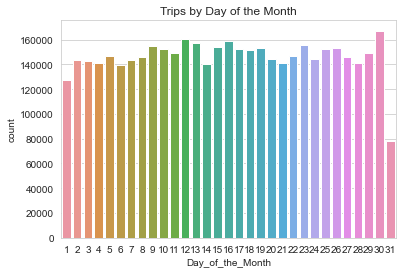

In [28]:
# plot trips by day of the month
sns.countplot('Day_of_the_Month', data=uber_2014_df)
plt.title('Trips by Day of the Month')

By a quick glance on the plot above, we can deduce that the highest trips are recorded at the 30th day of the Month. 

Text(0.5, 1.0, 'Trips by Day of the Month every Month')

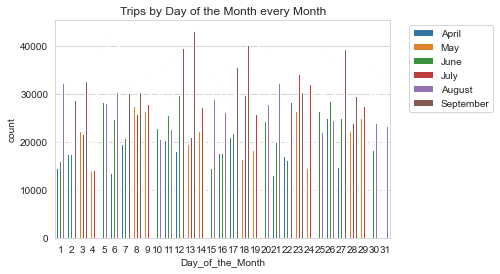

In [29]:
# plot trips by day of the month every month
sns.countplot('Day_of_the_Month', data=uber_2014_df, hue='Month')
plt.legend(bbox_to_anchor=(1.04, 1) ,loc='upper left')
plt.title('Trips by Day of the Month every Month')

### Number of trips during Months in a Year 

Text(0.5, 1.0, 'Trips by Month')

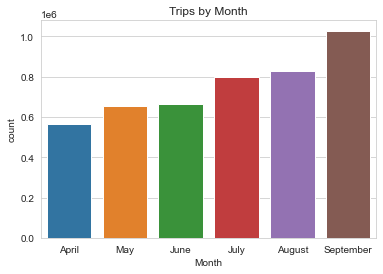

In [30]:
# plot trips by month
sns.countplot('Month', data=uber_2014_df)
plt.title('Trips by Month')

We notice that trips are at peak in the Month of September.

### Number of trips by Bases

Text(0.5, 1.0, 'Trips by Bases')

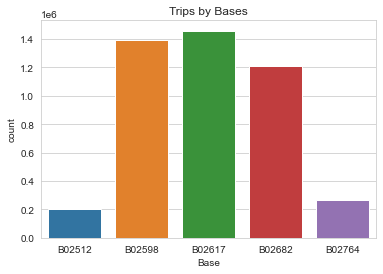

In [31]:
# plot trips by bases
sns.countplot('Base', data=uber_2014_df)
plt.title('Trips by Bases')

The highest number of trips was recorded at base B02617.

Text(0.5, 1.0, 'Trips by Bases every Month')

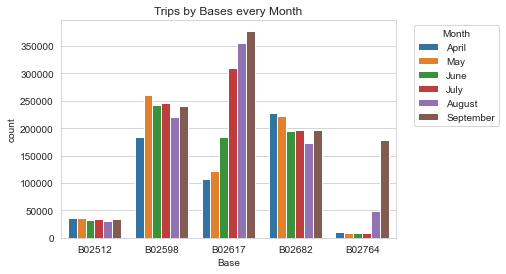

In [32]:
# plot trips by base every month
sns.countplot('Base', data=uber_2014_df, hue='Month')
plt.legend(bbox_to_anchor=(1.04, 1) ,loc='upper left', title='Month')
plt.title('Trips by Bases every Month')

It looks like across all the bases, the highest number of trips was highly contributed by the month of September.

Text(0.5, 1.0, 'Trips by bases every day of the week')

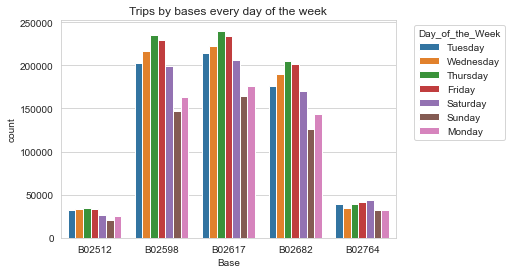

In [33]:
# plot trips by base every day of the week
sns.countplot('Base', data=uber_2014_df, hue='Day_of_the_Week')
plt.legend(bbox_to_anchor=(1.04, 1) ,loc='upper left', title='Day_of_the_Week')
plt.title('Trips by bases every day of the week')

It's clear here that in every base, the highest number of trips was recorded on Thurday.

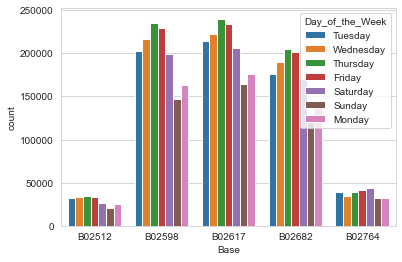

In [34]:
# this is the code for saving seaborn plot in the computer as image
sns.countplot('Base', data=uber_2014_df, hue='Day_of_the_Week').get_figure().savefig('countplot.png')

In [35]:
# import Image package for viewing images
from IPython.display import Image

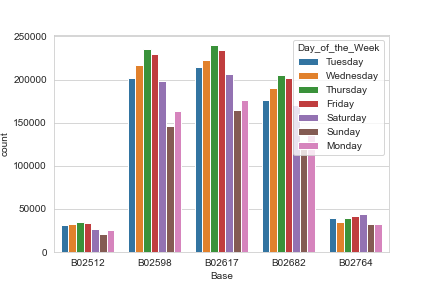

In [36]:
# view the image that was saved in the computer
Image("countplot.png")